# **GIT_COMMITS**

This notebook the description of the table `GIT_COMMITS`.

First, we import the libraries we need and, then, we read the corresponding csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gitCommits = pd.read_csv("../../data/raw/GIT_COMMITS.csv")
gitCommits.shape

(140687, 13)

We show the first rows of the table to get an idea of its content.


In [2]:
gitCommits.loc[0:4]

,projectID,commitHash,commitMessage,author,authorDate,authorTimezone,committer,committerDate,committerTimezone,branches,inMainBranch,merge,parents
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\r\n\...,Keith Turner,2011-10-04T00:46:07Z,0,Keith Turner,2011-10-04T00:46:07Z,0,['master'],True,False,[]
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",Billie Rinaldi,2011-10-04T16:57:13Z,0,Billie Rinaldi,2011-10-04T16:57:13Z,0,['master'],True,False,['e0880e263e4bf8662ba3848405200473a25dfc9f']
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,Keith Turner,2011-10-04T18:39:18Z,0,Keith Turner,2011-10-04T18:39:18Z,0,['master'],True,False,['e8774c5ec3a35e042f320540b5f7e66ebd2d9e87']
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\r\n\...,Billie Rinaldi,2011-10-04T19:31:01Z,0,Billie Rinaldi,2011-10-04T19:31:01Z,0,['master'],True,False,['2032ebbd0ed90734da39ca238bbd10dee24d0030']
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,Billie Rinaldi,2011-10-05T17:19:06Z,0,Billie Rinaldi,2011-10-05T17:19:06Z,0,['master'],True,False,['de297d4932e08625a5df146f0802041bb5aeb892']


Next, for each attribute, we obtain some information.

In some cases, we do not plot anything because there are lots of unique values of which we are not interested in the distribution, as they are categorical values.

## projectID

In [3]:
pd.unique(gitCommits["projectID"])

array(['accumulo', 'ambari', 'atlas', 'aurora', 'batik', 'beam', 'cocoon',
       'commons-bcel', 'commons-beanutils', 'commons-cli',
       'commons-codec', 'commons-collections', 'commons-configuration',
       'commons-daemon', 'commons-dbcp', 'commons-dbutils',
       'commons-digester', 'commons-exec', 'commons-fileupload',
       'commons-io', 'commons-jelly', 'commons-jexl', 'commons-jxpath',
       'commons-net', 'commons-ognl', 'commons-validator', 'commons-vfs',
       'felix', 'httpcomponents-client', 'httpcomponents-core',
       'mina-sshd', 'santuario', 'zookeeper'], dtype=object)

In [4]:
pd.unique(gitCommits["projectID"]).size

33

<BarContainer object of 33 artists>

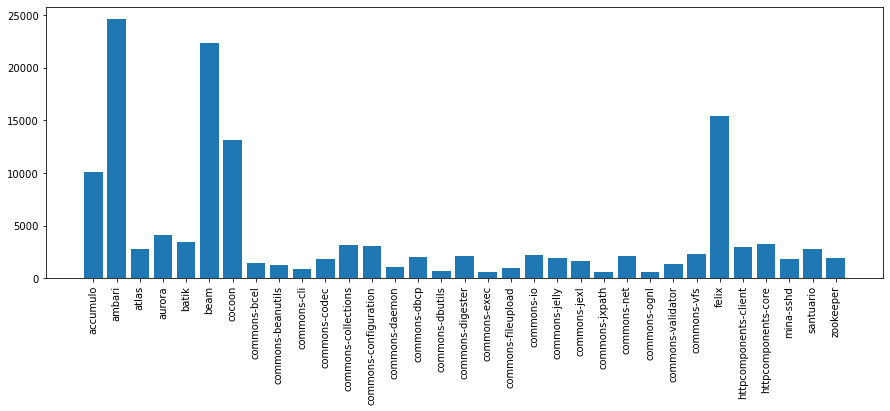

In [5]:
d = {}
for p in gitCommits["projectID"]:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## commitHash

In [6]:
commitHash = gitCommits["commitHash"]
commitHash

0         e0880e263e4bf8662ba3848405200473a25dfc9f
1         e8774c5ec3a35e042f320540b5f7e66ebd2d9e87
2         2032ebbd0ed90734da39ca238bbd10dee24d0030
3         de297d4932e08625a5df146f0802041bb5aeb892
4         34efaae87639a83b60fdb7274de4b45051025a3a
                            ...                   
140682    cc900a3b05bc31a237753680c8b00dc5866df4b2
140683    1c83846615701e88749690f06993a6e77452b83c
140684    f873dcf10e222e220732ab27cc6fc8c0ff0beec6
140685    a6c36b69cc72d7d67e392dab5360007d6f737bef
140686    4212f865d67b9c7860c1da071f3997b0a5b5387e
Name: commitHash, Length: 140687, dtype: object

In [7]:
pd.unique(commitHash).size

140687

## author

In [8]:
author = gitCommits["author"]
author

0           Keith Turner
1         Billie Rinaldi
2           Keith Turner
3         Billie Rinaldi
4         Billie Rinaldi
               ...      
140682       Brian Nixon
140683    Ivan Yurchenko
140684      Andor Molnar
140685           maoling
140686      Andor Molnar
Name: author, Length: 140687, dtype: object

In [9]:
pd.unique(author)

array(['Keith Turner', 'Billie Rinaldi', 'Eric C. Newton', ...,
       'Alexander A. Strelets', 'Vladimir Ivic', 'Ivan Yurchenko'],
      dtype=object)

In [10]:
pd.unique(author).size

1885

Number of NaNs and no-NaNs:

In [11]:
nans = author.isna().sum()
nans

34

In [12]:
authorNew = author[author.notnull()]
notnans = authorNew.count()

([<matplotlib.patches.Wedge at 0x7fe0a40756a0>,
 [Text(1.0999996829612884, 0.0008351557130699433, 'NaN'),
  Text(-1.099999683028482, -0.0008350672065512832, 'timestamp')])

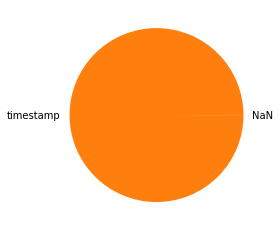

In [13]:
labels = 'NaN', 'timestamp'
plt.pie([nans, notnans], labels=labels)

## committer

In [14]:
committer = gitCommits["committer"]
pd.unique(committer)

array(['Keith Turner', 'Billie Rinaldi', 'Eric C. Newton', ...,
       'Fangmin Lyu', 'Enrico Olivelli', 'Norbert Kalmar'], dtype=object)

In [15]:
pd.unique(gitCommits["committer"]).size

1017

In [16]:
nans = committer.isna().sum()
nans

34

## committerDate

In [17]:
committerDate = gitCommits["committerDate"]
pd.unique(committerDate)

array(['2011-10-04T00:46:07Z', '2011-10-04T16:57:13Z',
       '2011-10-04T18:39:18Z', ..., '2019-07-16T09:21:14Z',
       '2019-07-17T13:42:32Z', '2019-07-19T13:08:30Z'], dtype=object)

In [18]:
pd.unique(committerDate).size

133109

In [19]:
min(committerDate)

'2000-10-01T07:37:01Z'

In [20]:
max(committerDate)

'2019-07-19T16:02:58Z'

In [21]:
committerDateYear = gitCommits.committerDate.str[:4]
pd.unique(committerDateYear).size

20

<BarContainer object of 20 artists>

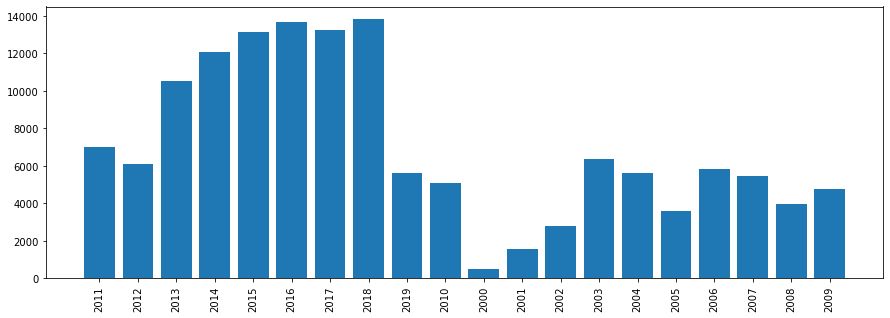

In [22]:
d = {}
for p in committerDateYear:
  if p not in d:
    d[p] = 0
  d[p] += 1

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(d.keys(), d.values())

## inMainBranch

In [23]:
inMainBranch = gitCommits["inMainBranch"]
pd.unique(inMainBranch)

array([ True])

In [24]:
nans = inMainBranch.isna().sum()
nans

0